# Modelo motor BLDC como DC.

Creamos la función del motor.

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def model_motor(x, u, Tl):
                       # u -> control input (voltaje), #tl -> external torque 
    R=0.343            # Impedance
    L = 0.00018        # Inductance
    kb=0.0167          # contraelectromotriz constant
    Jm=2.42*10**-6     # Motor inertia
    kt=0.0167          # Torque constant
    B=5.589458*10**-6

    current=x[0]       # current
    theta=x[1]         # angular postion
    theta_dot=x[2]     # angular velocity variable estado

    current_dot=(1/L)*u -(R/L)*current -(kb/L)*theta_dot       # Derivative of current
    theta_ddot= (kt/Jm)*current -(B/Jm)*theta_dot - (1/Jm)*Tl  # Angular aceleration
    return np.array([ current_dot, theta_dot, theta_ddot]) 
    # Return [Derivative of current, Angular velocity, Angular acceleration]

Configuración simulación

In [8]:
    # Simulation parameters
h = 0.001                           # Time step
t_sim2 = np.arange(0, 0.5, h)       # Simulation time array
x0 = np.array([0, 0, 0])            # Initial conditions
u =18* np.ones(len(t_sim2))         # voltaje  input 
Tl = np.zeros_like(t_sim2)          # Control input, Zero external torque input

x_sim2 = np.zeros((len(t_sim2), len(x0)))  # fill solution vector  with zeros
x_sim2[0] = x0                  

Resolvemos con RKDP 

In [9]:
for i in range(1, len(t_sim2)):
    k1=h*model_motor(x_sim2[i-1], u[i-1], Tl[i-1])
    k2=h*model_motor(x_sim2[i-1]+ (k1/5), u[i-1],Tl[i-1])
    k3=h*model_motor(x_sim2[i-1]+ (3/40)*k1 + (9/40)*k2, u[i-1],Tl[i-1])
    k4=h*model_motor(x_sim2[i-1]+ (44/45)*k1 - (56/15)*k2 + (32/9)*k3, u[i-1],Tl[i-1])
    k5=h*model_motor(x_sim2[i-1]+ (19372/6561)*k1 - (25360/2187)*k2 +(64448/6561)*k3 - (212/729)*k4, u[i-1],Tl[i-1])
    k6=h*model_motor(x_sim2[i-1]+ (9017/3168)*k1 -(355/33)*k2 +(46732/5247)*k3 + (49/176)*k4 - (5103/18656)*k5, u[i-1],Tl[i-1])
    k7=h*model_motor(x_sim2[i-1]+ (35/384)*k1 +(500/1113)*k3 +(125/192)*k4 -(2187/6784)*k5 + (11/84)*k6,u[i-1],Tl[i-1])
    x_sim2[i]=x_sim2[i-1]+ (35/384)*k1 + (500/1113)*k3 +(125/192)*k4 -(2187/6784)*k5 +(11/84)*k6
    #print(x_sim2[i])

Graficamos las respuestas obtenidas.

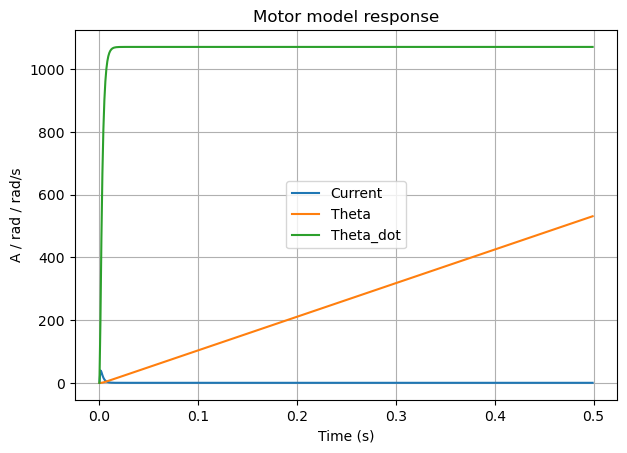

In [11]:
plt.figure(figsize=(7, 4.8))
plt.title('Motor model response')
plt.plot(t_sim2, x_sim2[:, 0], label='Current')  # Plot current
plt.plot(t_sim2, x_sim2[:, 1], label='Theta')  # Plot angular position
plt.plot(t_sim2, x_sim2[:, 2], label='Theta_dot')  # Plot angular velocity
plt.xlabel('Time (s)')
#plt.ylabel('Current/ Angle / Angular velocity')
plt.ylabel('A / rad / rad/s')
plt.legend()
plt.grid(True)
plt.show()

Salida en modo subplot

Text(0.5, 0.98, 'Respuesta del modelo')

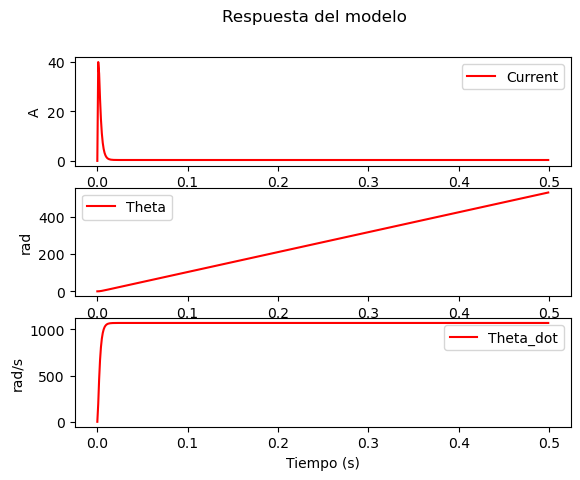

In [26]:
plt.subplot(3,1,1)
plt.plot(t_sim2, x_sim2[:, 0], label='Current', color='r')  # Plot current
plt.ylabel('A')
plt.legend()
plt.subplot(3,1,2)
plt.plot(t_sim2, x_sim2[:, 1], label='Theta', color='r')  # Plot angular position
plt.ylabel('rad')
plt.legend()
plt.subplot(3,1,3)
plt.plot(t_sim2, x_sim2[:, 2], label='Theta_dot', color='r')  # Plot angular velocity
plt.ylabel('rad/s')
plt.xlabel('Tiempo (s)')
plt.legend()
plt.suptitle('Respuesta del modelo')